In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url1 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
url2 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')
flights = pd.read_csv(url1, sep=',')
weather =  pd.read_csv(url2, sep=',')

Задача. Исследовать датасет задержек в аэропортах Нью-Йорка за 2013 год.

In [4]:
flights.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [5]:
weather.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


1.Зависимость задержек от месяца.

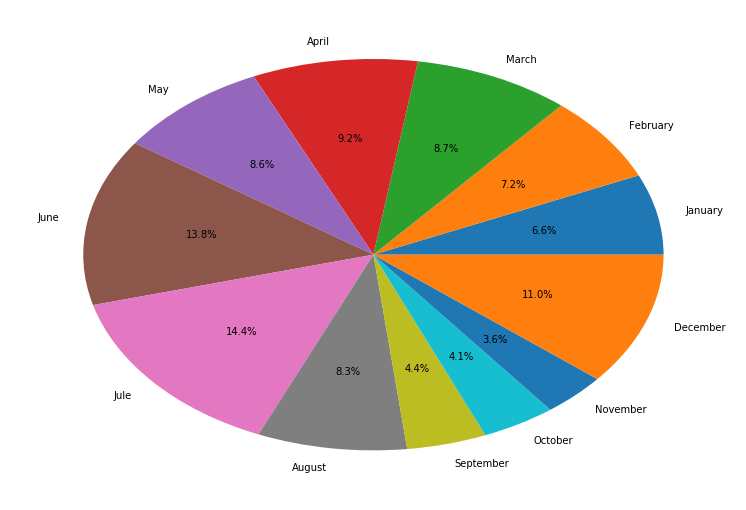

In [108]:
month_flights = flights.groupby("month")
avg_delay = month_flights['dep_delay'].mean()
labels = ["January", "February", "March", "April", "May", "June", "Jule", "August",
          "September", "October", "November", "December" ]
plt.figure(figsize=(13,9))
plt.pie(avg_delay, labels = labels, autopct='%1.1f%%')
plt.show()

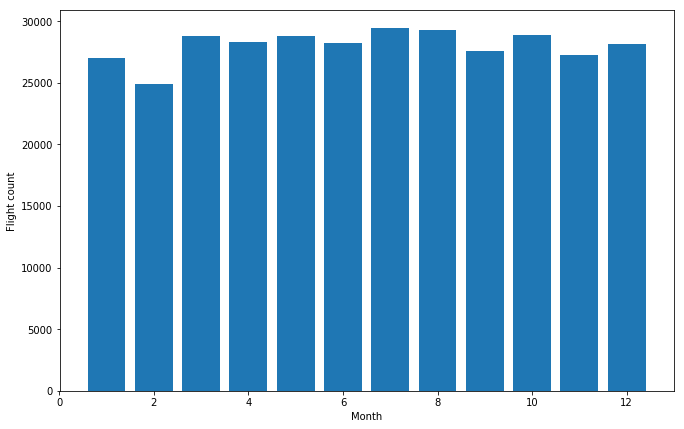

In [107]:
flightmonth = flights.groupby('month')['Unnamed: 0']
arr = flightmonth.count()
plt.figure(figsize=(11,7))
plt.bar(arr.index, arr)
plt.xlabel('Month')
plt.ylabel('Flight count')
plt.show()

Вывод: В июне, июле и декабре наибольшее число задержек, при том, что число рейсов каждый месяц примерно одинаковое. Скорее всего это связано с тем, что летом у персонала отпуска,а зимой праздники. Рекомендуется увеличить численность персонала.

2)Зависимость задержек от аэропорта.

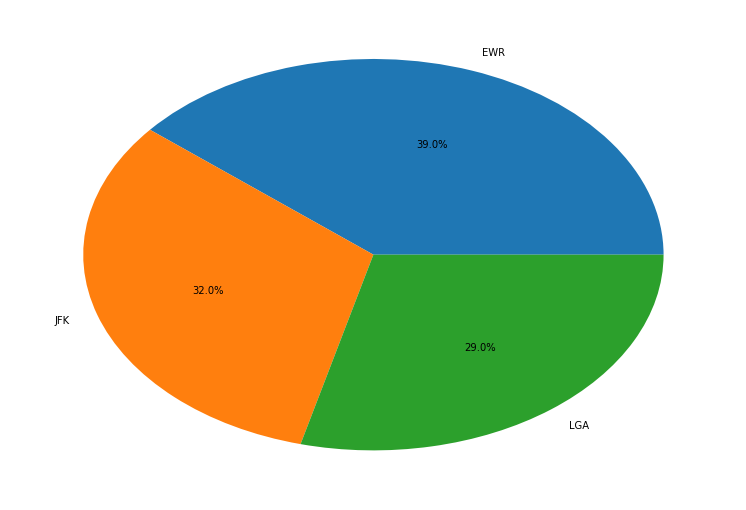

In [52]:
origin_delay = pd.DataFrame(flights[flights.arr_delay>0].groupby(['origin'])['arr_delay'].sum())
plt.figure(figsize=(13,9))
plt.pie(origin_delay, labels=['EWR','JFK','LGA'], autopct='%1.1f%%')
plt.show()

Вывод: Из диаграммы видно, что больше всего задержек приходится на аэропорт EWR, а меньше всего на LGA. Рекомендуется перенести часть рейсов аэропорта EWR, на аэропорт LGA.

3)Зависимость задержек от перевозчика.

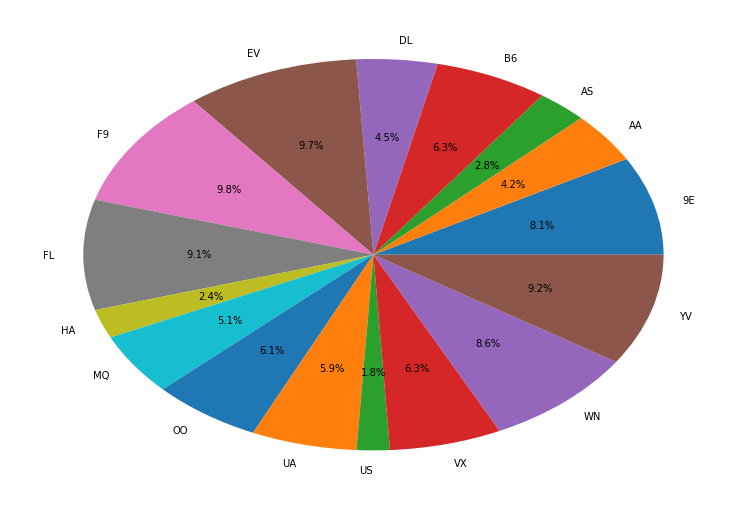

In [109]:
delay_carrier = pd.DataFrame(flights.groupby(['carrier'])['dep_delay'].mean())
plt.figure(figsize=(13,9))
plt.pie(delay_carrier, labels=["9E", "AA", "AS", "B6", "DL", "EV", "F9", "FL",
          "HA", "MQ", "OO", "UA","US","VX","WN","YV" ], autopct = '%1.1f%%')
plt.show()

Вывод: Наименьшая средняя задержка приходится на перевозчиков US, HA, AS. Остальным перевозчикам следует проконсультироваться с ними, как перевозить пассажиров.  

4) Влияние видимости на задержки.

In [70]:
flight_weather = flights.merge(weather, on = ['year','month', 'day', 'hour', 'origin'], how='inner')

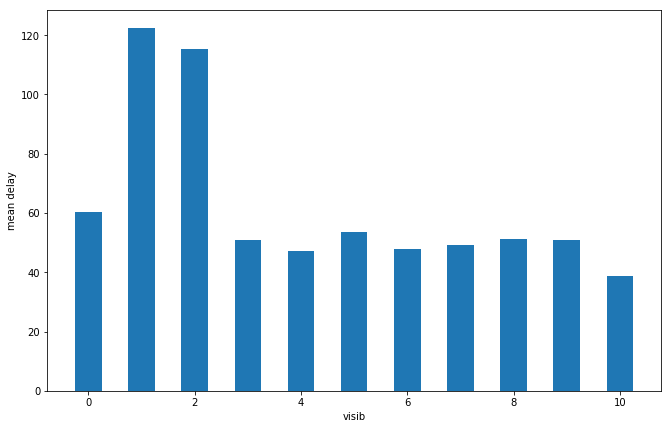

In [77]:
visib_delay = pd.DataFrame(flight_weather[flight_weather.arr_delay>0].groupby(['visib'])['arr_delay'].mean().
                           reset_index(name='mean_delay'))
visib_delay['visib']=visib_delay['visib'].apply(round)
plt.figure(figsize=(11,7))
plt.bar(visib_delay.visib, visib_delay.mean_delay, width = 0.5)
plt.xlabel('visib')
plt.ylabel('mean delay')
plt.show()

Вывод: При плохой видимости( при уровне видимости 1-2) происходит больше задержек. В аэропортах стоит улучшить оборудование для полетов с низкой видимостью.

5) Зависимость задержки от скорости ветра.

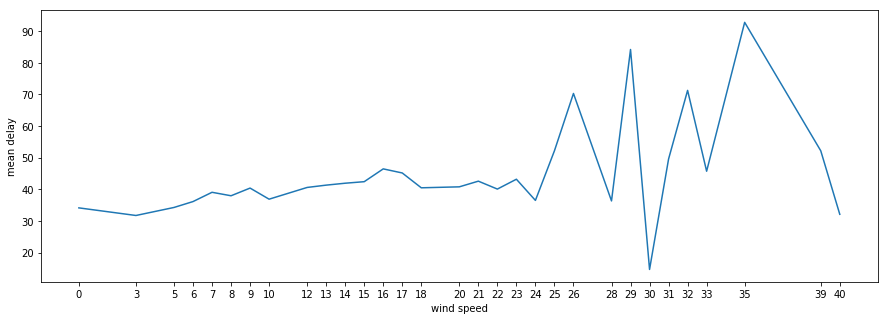

In [98]:
windspeed_delay = pd.DataFrame(flight_weather[flight_weather.dep_delay>0].groupby(['wind_speed'])['dep_delay'].mean().
                          reset_index(name='mean_delay'))
windspeed_delay['wind_speed']=windspeed_delay['wind_speed'].apply(round)
windspeed_delay = windspeed_delay.sort_values("wind_speed")
windspeed_delay = windspeed_delay.drop(labels=[windspeed_delay.index[-1]])
plt.figure(figsize=(15,5))
plt.xticks(windspeed_delay.wind_speed)
plt.plot(windspeed_delay.wind_speed, windspeed_delay.mean_delay)
plt.xlabel('wind speed')
plt.ylabel('mean delay')
plt.show()

Вывод: С ростом скорости ветра задержка как правило увеличивается.

6)Зависимость задержек от влажности воздуха.

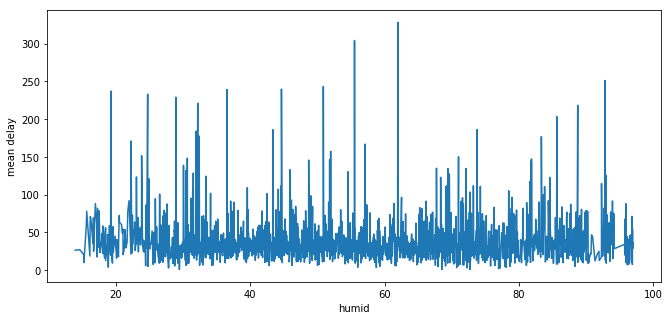

In [106]:
humid_delay = pd.DataFrame(flight_weather[flight_weather.dep_delay>0].groupby(['humid'])['dep_delay'].mean().
                          reset_index(name='mean_delay'))
humid_delay = humid_delay.sort_values("humid")
humid_delay = humid_delay.drop(labels=[humid_delay.index[-1]])
plt.figure(figsize=(11,5))
plt.plot(humid_delay.humid, humid_delay.mean_delay)
plt.xlabel('humid')
plt.ylabel('mean delay')
plt.show()

Вывод: Наибольшие задержки при влажноси воздуха 50-60%. Повлиять на это невозможно.